In [14]:
import transformers
import sys
import ipywidgets
import imp
import pandas as pd
import numpy as np
import torch
import googletrans

In [28]:
%load_ext rpy2.ipython
import rpy2.robjects.lib.ggplot2 as ggplot2

In [11]:
from multilingual_scorer import MultilingualScorer

In [12]:
mls = MultilingualScorer(cache_dir="/shared_hd2/huggingface/")

/home/stephan/notebooks/child-directed-listening/lib/python3.7/site-packages/transformers/models/auto/modeling_auto.py:890: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,
Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.
Special tokens have been added in the vocabulary, make sure the associated word embedding are fine-tuned or trained.


In [89]:
mls.score('We zullen met ze praten.', 'nl')

[tensor(27.4435)]

In [90]:
mls.score('We wil talk to them.', 'en')

[tensor(29.6035)]

In [3]:
from googletrans import Translator
translator = Translator()

In [44]:
def get_translation_probs(target_sentence):
    scores = []
    for language in ['de', 'nl','fr', 'en']:
        if language == 'en':
            translated_text = target_sentence
            en_score = mls.score(translated_text, language)
        else:
            translated_text = translator.translate(target_sentence, dest=language, src='en').text
        score = mls.score(translated_text, language)    
        scores.append({'language':language,
         'translation': translated_text,
        'score': score[0].numpy(),        
        'source_text': target_sentence})
    
    rdf = pd.DataFrame(scores)
    rdf['en_score'] = en_score[0].numpy().astype('float')
    return(rdf)

get_translation_probs("What is that?") 

,language,translation,score,source_text,en_score
0,de,Was ist das?,8.088748,What is that?,11.236427
1,nl,Wat is dat?,12.705499,What is that?,11.236427
2,fr,Qu'est-ce que c'est?,51.123817,What is that?,11.236427
3,en,What is that?,11.236427,What is that?,11.236427


In [79]:
sentences = [
    'We will talk to them.',
    'What is that?',
    "Please don't do that.",
    "Where is the dog?",
    "That's a bad idea.",
    "Bring that over here.",
    "Come back over here.",
    "Look at all the stars!",
    "It's time to go to bed.",
    "Give me the cookie.",
    'How do you know?',
    "I'm going to the store",
    'The dog chased the cat.',
    'The cat chased the dog.',
    "I spilled the milk"]

In [80]:
sentence_probs = pd.concat([get_translation_probs(x) for x in sentences]) 

In [81]:
sentence_probs.score = sentence_probs.score.astype('float')

In [82]:
%R -i sentence_probs
sentence_probs

,language,translation,score,source_text,en_score
0,de,Wir werden mit ihnen reden.,19.964352,We will talk to them.,20.037979
1,nl,We zullen met ze praten.,27.443476,We will talk to them.,20.037979
2,fr,Nous leur parlerons.,25.929384,We will talk to them.,20.037979
3,en,We will talk to them.,20.037979,We will talk to them.,20.037979
0,de,Was ist das?,8.088748,What is that?,11.236427
1,nl,Wat is dat?,12.705499,What is that?,11.236427
2,fr,Qu'est-ce que c'est?,51.123817,What is that?,11.236427
3,en,What is that?,11.236427,What is that?,11.236427
0,de,Bitte tu das nicht.,21.612646,Please don't do that.,13.669483
1,nl,Doe dat alsjeblieft niet.,28.177673,Please don't do that.,13.669483


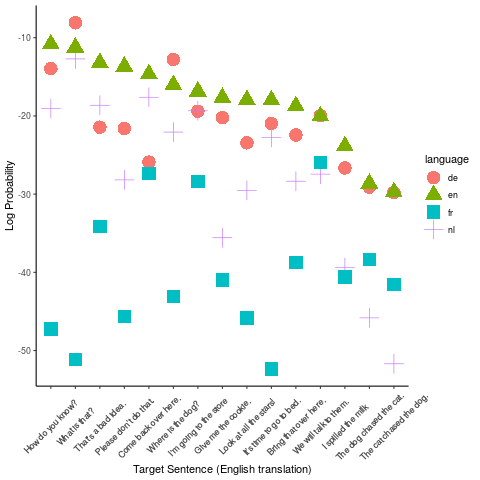

In [85]:
%%R
sprobs = aggregate(en_score ~ source_text, sentence_probs, mean)
sprobs = sprobs[order(sprobs$en_score),]

sentence_probs$source_text = factor(sentence_probs$source_text, levels = sprobs$source_text)

ggplot(sentence_probs) + geom_point(aes(x=source_text, y=-1*score, color=language, shape=language)
, size=6 ) + theme_classic() + theme(axis.text.x = element_text(angle = 45, vjust = 0.5)
) + xlab('Target Sentence (English translation)') + ylab('Log Probability')

# Compare probability of Grammatical and ungrammatical variants

In [91]:
print(mls.score('The cats are on the bed.', 'en'))
print(mls.score('The cat are on the bed.', 'en'))

[tensor(31.1944)]
[tensor(35.7569)]


In [92]:
print(mls.score('Two little kitty cats.', 'en'))
print(mls.score('Two little kitty cat.', 'en'))

[tensor(26.4771)]
[tensor(31.5945)]
